In [192]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [193]:
#create dataframe object
data=pd.read_csv('winequality-white.csv',sep=';')

In [194]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [196]:
data.describe() # percentile,.ean and std of numerical values

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Feature Engineering

In [197]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [198]:
data['quality']

0       6
1       6
2       6
3       6
4       6
5       6
6       6
7       6
8       6
9       6
10      5
11      5
12      5
13      7
14      5
15      7
16      6
17      8
18      6
19      5
20      8
21      7
22      8
23      5
24      6
25      6
26      6
27      6
28      6
29      7
       ..
4868    6
4869    6
4870    7
4871    6
4872    5
4873    6
4874    6
4875    6
4876    7
4877    5
4878    4
4879    6
4880    6
4881    6
4882    5
4883    6
4884    5
4885    6
4886    7
4887    7
4888    5
4889    6
4890    6
4891    6
4892    5
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

## Feature selection

In [199]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [200]:
X=data.drop('quality',axis=1)
y=data['quality']
y.shape

(4898,)

In [201]:
y.head

<bound method NDFrame.head of 0       6
1       6
2       6
3       6
4       6
5       6
6       6
7       6
8       6
9       6
10      5
11      5
12      5
13      7
14      5
15      7
16      6
17      8
18      6
19      5
20      8
21      7
22      8
23      5
24      6
25      6
26      6
27      6
28      6
29      7
       ..
4868    6
4869    6
4870    7
4871    6
4872    5
4873    6
4874    6
4875    6
4876    7
4877    5
4878    4
4879    6
4880    6
4881    6
4882    5
4883    6
4884    5
4885    6
4886    7
4887    7
4888    5
4889    6
4890    6
4891    6
4892    5
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64>

In [202]:
y.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [203]:
import seaborn as sns

In [204]:
# finding correlation beteen features
corr=X.corr()
corr.shape

(11, 11)

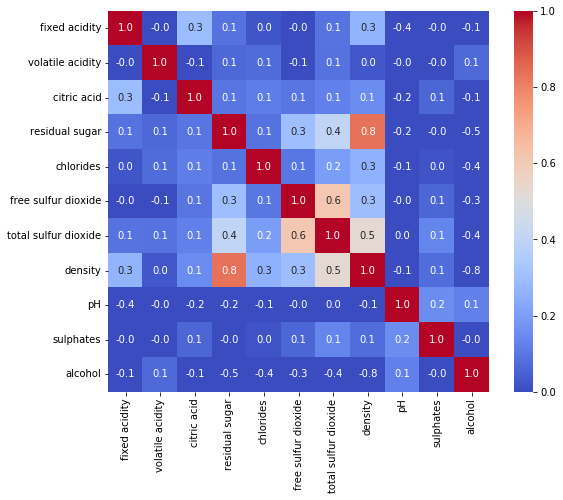

In [205]:
#Plotting Heatmap to find correlation among features
plt.figure(figsize=(9,7))
sns.heatmap(corr,vmin=0,vmax=1,annot=True,fmt=".1f",cbar=True,square=True,cmap='coolwarm')
plt.show()

In [206]:
def correlation(dataset,threshold):
    col_corr=set()
    corr=dataset.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])>threshold:
                colname=corr.columns[i]
                col_corr.add(colname)
    return col_corr

In [207]:
corr_features=correlation(X,.5)
print(corr_features)

{'density', 'total sulfur dioxide', 'alcohol'}


In [208]:
X_new=X.drop(corr_features,axis=1)
X_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates
0,7.0,0.270,0.36,20.70,0.045,45.0,3.00,0.45
1,6.3,0.300,0.34,1.60,0.049,14.0,3.30,0.49
2,8.1,0.280,0.40,6.90,0.050,30.0,3.26,0.44
3,7.2,0.230,0.32,8.50,0.058,47.0,3.19,0.40
4,7.2,0.230,0.32,8.50,0.058,47.0,3.19,0.40
5,8.1,0.280,0.40,6.90,0.050,30.0,3.26,0.44
6,6.2,0.320,0.16,7.00,0.045,30.0,3.18,0.47
7,7.0,0.270,0.36,20.70,0.045,45.0,3.00,0.45
8,6.3,0.300,0.34,1.60,0.049,14.0,3.30,0.49
9,8.1,0.220,0.43,1.50,0.044,28.0,3.22,0.45


In [209]:
y.shape

(4898,)

## Split the train and test data set

In [210]:
from sklearn.model_selection import train_test_split
X_new_train,X_new_test,y_train,y_test=train_test_split(X_new,y,test_size=.20,random_state=1)

## Naive Bayes

In [211]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(X_new_train,y_train)

GaussianNB()

In [212]:
predicted_naive=naive.predict(X_new_test)
print(predicted_naive)

[6 5 7 6 6 6 5 5 5 6 7 6 7 6 7 4 7 5 5 6 7 6 6 6 6 6 6 6 6 7 6 6 7 6 7 7 6
 6 4 7 4 6 6 6 5 6 6 6 5 7 7 6 7 6 6 7 7 7 6 4 7 6 5 6 7 7 5 7 7 6 7 6 7 6
 6 7 6 6 6 6 6 4 6 7 5 6 7 7 7 6 7 5 5 7 6 7 6 6 7 6 6 5 6 7 7 6 7 5 6 7 6
 6 6 6 6 6 5 6 6 6 6 7 7 6 5 6 7 6 7 5 5 6 6 6 6 6 6 6 7 7 6 6 4 7 7 7 7 7
 6 5 6 6 7 5 5 7 7 6 5 6 6 7 6 6 4 5 7 5 7 7 3 7 6 7 5 6 6 6 6 6 7 7 7 6 7
 5 6 6 7 7 7 7 7 7 7 6 6 6 6 7 5 6 6 5 6 6 6 7 6 6 5 6 6 5 6 7 6 7 6 6 7 7
 6 7 7 7 5 6 7 5 4 6 6 6 6 6 4 6 7 4 5 6 6 6 7 6 6 6 6 6 6 6 6 7 6 6 7 4 6
 5 5 6 6 7 6 7 7 6 7 6 7 5 6 5 6 6 7 6 6 6 7 5 7 7 6 7 7 6 6 6 7 6 6 6 7 6
 6 7 5 6 6 7 7 6 6 6 6 7 7 6 7 7 6 6 6 6 6 6 7 6 5 5 7 7 6 6 6 7 7 6 6 8 4
 6 6 6 6 6 5 7 6 6 6 6 7 6 5 6 7 6 6 7 5 6 7 6 5 6 6 6 6 7 7 6 7 6 6 6 6 6
 6 7 3 5 6 6 7 6 7 6 6 4 7 4 6 6 7 7 7 6 7 6 7 6 7 7 6 5 7 5 5 7 7 6 7 5 5
 6 7 7 7 7 6 6 6 4 6 6 6 5 7 6 6 6 6 7 7 6 6 7 5 5 6 6 5 5 5 6 6 6 6 6 7 6
 6 7 6 6 6 6 7 6 6 7 5 6 6 6 7 5 5 5 6 6 6 5 6 6 6 5 7 6 6 7 4 7 6 6 6 6 7
 7 6 7 6 6 6 6 5 7 7 6 6 

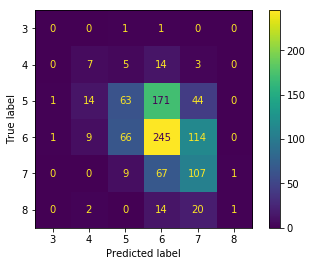

In [170]:
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
cm_naive=metrics.confusion_matrix(y_test,predicted_naive)
cmd=ConfusionMatrixDisplay(cm_naive,display_labels=['3','4','5','6','7','8','9'])
cmd.plot()

In [171]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_naive))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.22      0.24      0.23        29
           5       0.44      0.22      0.29       293
           6       0.48      0.56      0.52       435
           7       0.37      0.58      0.45       184
           8       0.50      0.03      0.05        37

    accuracy                           0.43       980
   macro avg       0.33      0.27      0.26       980
weighted avg       0.44      0.43      0.41       980



[0.         0.00102249 0.00613497 0.00817996 0.03169734 0.03374233
 0.0603272  0.06237219 0.07566462 0.07770961 0.12372188 0.12576687
 0.15644172 0.1605317  0.16155419 0.16359918 0.20347648 0.20552147
 0.21881391 0.2208589  0.23006135 0.23210634 0.25664622 0.25869121
 0.2791411  0.28118609 0.28629857 0.28834356 0.33231084 0.33435583
 0.34151329 0.34355828 0.38548057 0.38752556 0.38957055 0.39161554
 0.42126789 0.42331288 0.42638037 0.42944785 0.51226994 0.51635992
 0.52760736 0.53067485 0.53578732 0.53783231 0.5593047  0.56134969
 0.57259714 0.57566462 0.58486708 0.58691207 0.59509202 0.59713701
 0.6196319  0.62167689 0.64314928 0.64519427 0.66359918 0.66564417
 0.69222904 0.69222904 0.69529652 0.69734151 0.70245399 0.70449898
 0.73517382 0.73721881 0.78425358 0.78629857 0.80981595 0.81186094
 0.82719836 0.82924335 0.83435583 0.83640082 0.85071575 0.85480573
 0.87730061 0.8793456  0.93558282 0.93762781 0.96319018 0.96523517
 0.96625767 0.96830266 0.99591002 0.99591002 1.        ]
[0.  

C:\Users\arif\.conda\envs\ratnabali\lib\site-packages\sklearn\metrics\_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Text(0.5,1,'Multiclass ROC curve')

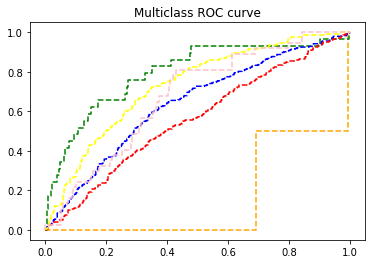

In [172]:
from sklearn.metrics import roc_curve
naive_probs=naive.predict_proba(X_new_test) 

fpr = {}
tpr = {}
thresh ={}

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, naive_probs[:,i], pos_label=i+3)
print(fpr[0])
print(tpr[0])
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 3 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 4 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 5 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 6 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 7 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='pink', label='Class 8 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='purple', label='Class 9 vs Rest')

plt.title('Multiclass ROC curve')

In [173]:
accuracy_naive=metrics.accuracy_score(y_test,predicted_naive)
print(accuracy_naive)

0.4316326530612245


 ## K-Nearest Neighnour

In [174]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_new_train,y_train)

KNeighborsClassifier()

In [175]:
predicted_knn=knn.predict(X_new_test)
print(predicted_knn)

[6 6 6 5 6 6 6 4 6 6 6 6 5 5 6 5 7 6 5 6 6 6 5 6 6 5 5 6 6 6 5 5 6 5 6 7 5
 5 5 5 4 6 5 6 6 6 6 5 5 5 6 6 7 6 6 5 7 5 6 6 5 5 5 5 6 6 6 6 8 6 6 6 6 6
 5 5 5 5 6 5 6 6 6 7 5 7 6 5 5 6 6 6 6 6 6 7 6 6 6 6 6 5 5 6 6 5 5 4 6 5 5
 5 4 6 6 5 6 6 6 6 5 7 6 5 6 5 5 6 6 5 5 7 6 6 5 4 5 6 6 5 6 7 5 5 5 5 7 6
 5 6 6 5 5 6 5 7 6 5 6 6 5 6 5 6 6 6 7 5 6 6 3 6 6 6 6 5 5 5 5 6 7 6 6 6 6
 5 7 5 7 6 6 5 6 6 6 8 6 6 6 5 6 6 6 6 5 6 5 6 6 6 6 7 5 6 5 6 6 6 6 6 7 6
 6 7 5 7 5 5 6 5 6 6 7 5 6 6 4 8 5 6 5 7 5 5 6 7 5 5 6 5 6 6 6 6 6 6 6 4 5
 6 6 5 5 6 5 6 6 5 6 5 6 5 5 6 6 6 6 5 5 6 7 6 6 6 6 5 6 6 6 5 4 6 6 6 5 6
 5 6 7 6 5 6 6 5 5 6 6 6 6 6 5 6 5 5 7 6 6 6 7 6 6 5 4 6 6 6 6 6 7 6 5 5 5
 6 4 5 5 6 6 6 5 6 5 5 5 8 5 6 7 6 6 6 5 4 6 4 5 5 6 6 6 6 5 6 6 6 6 6 6 5
 5 6 7 7 5 5 7 5 6 7 5 6 6 6 5 7 6 6 6 6 7 6 6 6 5 6 6 5 6 7 5 5 6 5 6 6 6
 7 6 8 5 6 5 6 7 6 5 6 5 5 6 6 6 6 5 6 6 6 7 5 4 6 5 5 5 6 5 6 6 6 5 6 6 7
 5 5 6 5 6 6 5 5 6 6 6 5 5 5 6 5 6 6 6 7 6 6 6 6 6 5 6 6 5 7 4 6 5 5 6 6 6
 7 6 6 6 6 6 6 5 5 6 6 5 

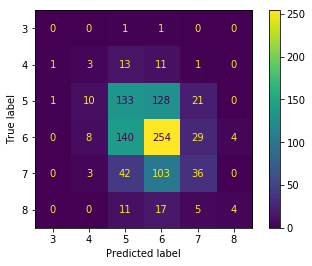

In [176]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_knn=metrics.confusion_matrix(y_test,predicted_knn)
cmd=ConfusionMatrixDisplay(cm_knn,display_labels=['3','4','5','6','7','8','9'])
cmd.plot()


In [177]:
accuracy_knn=metrics.accuracy_score(y_test,predicted_knn)
print(accuracy_knn)

0.4387755102040816


C:\Users\arif\.conda\envs\ratnabali\lib\site-packages\sklearn\metrics\_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Text(0.5,1,'Multiclass ROC curve')

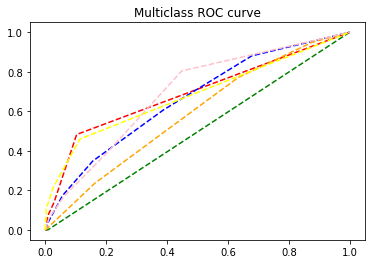

In [178]:
from sklearn.metrics import roc_curve
knn_probs=knn.predict_proba(X_new_test)
fpr={}
tpr={}
thresh={}
n_classes=7
for i in range(n_classes):
    fpr[i],tpr[i],thresh[i]=roc_curve(y_test,knn_probs[:,i],pos_label=i+3)
## Plotting
plt.plot(fpr[0],tpr[0],linestyle='--',color='green',label='class 3 vs rest')
plt.plot(fpr[1],tpr[1],linestyle='--',color='red',label='class 4 vs rest')
plt.plot(fpr[2],tpr[2],linestyle='--',color='blue',label='class 5 vs rest')
plt.plot(fpr[3],tpr[3],linestyle='--',color='orange',label='class 6 vs rest')
plt.plot(fpr[4],tpr[4],linestyle='--',color='pink',label='class 7 vs rest')
plt.plot(fpr[5],tpr[5],linestyle='--',color='yellow',label='class 8 vs rest')
plt.plot(fpr[6],tpr[6],linestyle='--',color='purple',label='class 9 vs rest')
plt.title('Multiclass ROC curve')

## Decision Tree


In [179]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_new_train,y_train)

DecisionTreeClassifier()

In [180]:
predicted_dtree=dtree.predict(X_new_test)

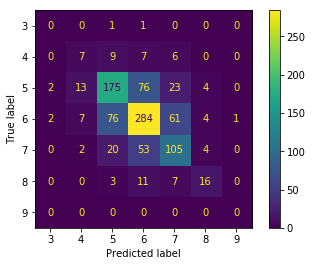

In [181]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_dtree=metrics.confusion_matrix(y_test,predicted_dtree)
cmd=metrics.ConfusionMatrixDisplay(cm_dtree,display_labels=['3','4','5','6','7','8','9'])
cmd.plot()

In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_dtree))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.24      0.24      0.24        29
           5       0.62      0.60      0.61       293
           6       0.66      0.65      0.66       435
           7       0.52      0.57      0.54       184
           8       0.57      0.43      0.49        37
           9       0.00      0.00      0.00         0

    accuracy                           0.60       980
   macro avg       0.37      0.36      0.36       980
weighted avg       0.60      0.60      0.60       980



C:\Users\arif\.conda\envs\ratnabali\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arif\.conda\envs\ratnabali\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arif\.conda\envs\ratnabali\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [183]:
accuracy_dtree=metrics.accuracy_score(y_test,predicted_dtree)
print(accuracy_dtree)

0.5989795918367347


C:\Users\arif\.conda\envs\ratnabali\lib\site-packages\sklearn\metrics\_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Text(0.5,1,'Multiclass ROC curve')

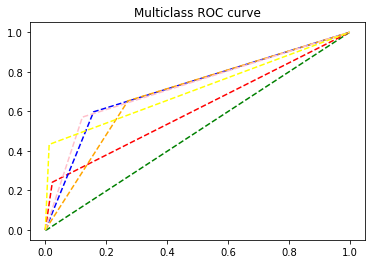

In [184]:
from sklearn.metrics import roc_curve
fpr={}
tpr={}
thresh={}
dtree_probs=dtree.predict_proba(X_new_test)

n_class=7
for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(y_test,dtree_probs[:,i],pos_label=i+3)
 # Plotting
plt.plot(fpr[0],tpr[0],linestyle='--',color='green',label='class 3 vs rest')
plt.plot(fpr[1],tpr[1],linestyle='--',color='red',label='class 4 vs rest')
plt.plot(fpr[2],tpr[2],linestyle='--',color='blue',label='class 5 vs rest')
plt.plot(fpr[3],tpr[3],linestyle='--',color='orange',label='class 6 vs rest')
plt.plot(fpr[4],tpr[4],linestyle='--',color='pink',label='class 7 vs rest')
plt.plot(fpr[5],tpr[5],linestyle='--',color='yellow',label='class 8 vs rest')
plt.plot(fpr[6],tpr[6],linestyle='--',color='purple',label='class 9 vs rest')
plt.title('Multiclass ROC curve')   

## Random Forest

In [185]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_new_train,y_train)

RandomForestClassifier()

In [186]:
predicted_rf=rf.predict(X_new_test)

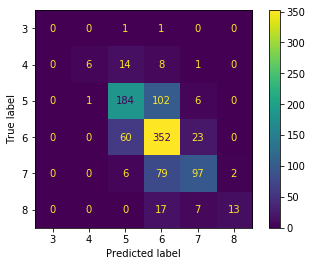

In [187]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
cm_rf=metrics.confusion_matrix(y_test,predicted_rf)
cmd=metrics.ConfusionMatrixDisplay(cm_rf,display_labels=['3','4','5','6','7','8','9'])
cmd.plot()

In [188]:
accuracy_rf=metrics.accuracy_score(y_test,predicted_rf)
print(accuracy_rf)

0.6653061224489796


In [189]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_rf))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.86      0.21      0.33        29
           5       0.69      0.63      0.66       293
           6       0.63      0.81      0.71       435
           7       0.72      0.53      0.61       184
           8       0.87      0.35      0.50        37

    accuracy                           0.67       980
   macro avg       0.63      0.42      0.47       980
weighted avg       0.68      0.67      0.65       980



C:\Users\arif\.conda\envs\ratnabali\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arif\.conda\envs\ratnabali\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arif\.conda\envs\ratnabali\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\arif\.conda\envs\ratnabali\lib\site-packages\sklearn\metrics\_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Text(0.5,1,'Multiclass ROC curve')

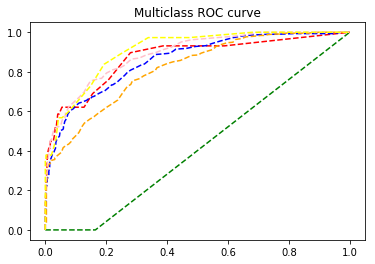

In [190]:
from sklearn.metrics import roc_curve
fpr={}
tpr={}
thresh={}
n_class=7
rf_probs=rf.predict_proba(X_new_test)
for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(y_test,rf_probs[:,i],pos_label=i+3)
#Plotting
plt.plot(fpr[0],tpr[0],linestyle='--',color='green',label='class 3 vs rest')
plt.plot(fpr[1],tpr[1],linestyle='--',color='red',label='class 4 vs rest')
plt.plot(fpr[2],tpr[2],linestyle='--',color='blue',label='class 5 vs rest')
plt.plot(fpr[3],tpr[3],linestyle='--',color='orange',label='class 6 vs rest')
plt.plot(fpr[4],tpr[4],linestyle='--',color='pink',label='class 7 vs rest')
plt.plot(fpr[5],tpr[5],linestyle='--',color='yellow',label='class 8 vs rest')
plt.plot(fpr[6],tpr[6],linestyle='--',color='purple',label='class 9 vs rest')
plt.title('Multiclass ROC curve')   




In [191]:
results = pd.DataFrame({
    'Model': ['Navies Bayes','KNN' ,'Decision Tree','Random forest'],
    'Score': [.431632,.43877,.6030,.660204]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.660204,Random forest
0.603000,Decision Tree
0.438770,KNN
0.431632,Navies Bayes
